In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas_datareader as dr



In [ ]:
df=dr.data.get_data_yahoo('PVR.NS',start='2015-10-6',end='2020-10-11')


In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-06,851.000000,829.000000,840.750000,846.000000,217860.0,838.259888
2015-10-07,860.049988,833.200012,849.900024,838.700012,81982.0,831.026672
2015-10-08,845.900024,826.200012,845.900024,834.599976,120263.0,826.964172
2015-10-09,853.000000,825.000000,851.950012,828.299988,61289.0,820.721802
2015-10-12,839.950012,815.000000,832.000000,823.400024,76889.0,815.866699
...,...,...,...,...,...,...
2020-10-06,1299.000000,1245.050049,1280.000000,1273.400024,2373350.0,1273.400024
2020-10-07,1286.949951,1248.000000,1278.000000,1263.500000,1424254.0,1263.500000
2020-10-08,1284.800049,1248.150024,1276.699951,1255.050049,1556486.0,1255.050049


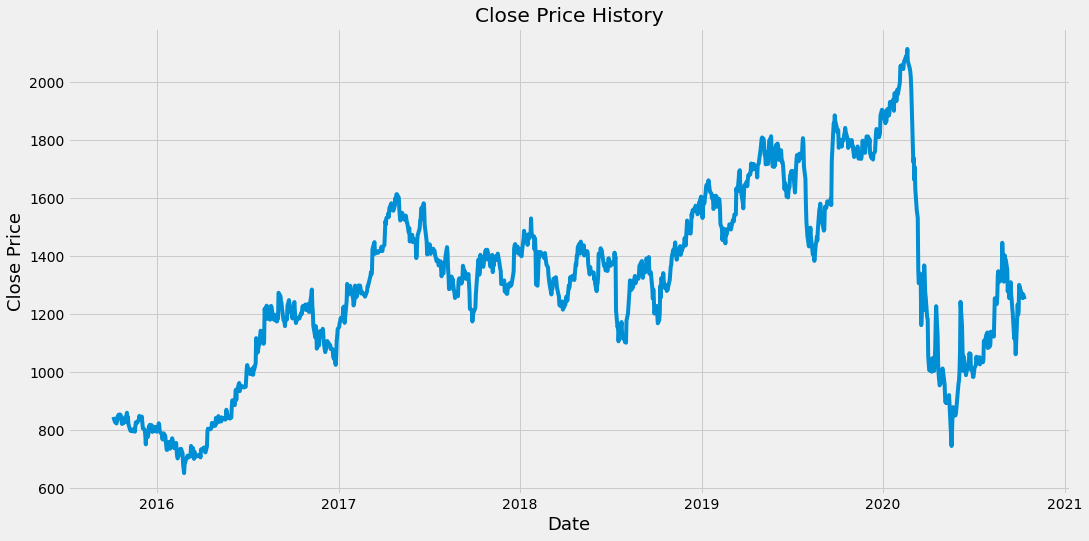

In [ ]:
#visuliazing the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
#new dataframe
data=df.filter(['Close'])
#coverting to numpy
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

988

In [ ]:
#scaling the datas
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.13244762],
       [0.12744831],
       [0.12464045],
       ...,
       [0.4125805 ],
       [0.42172306],
       [0.40994381]])

In [ ]:
#creating the dataset
train_data=scaled_data[0:training_data_len,:]
#split
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.13244762, 0.12744831, 0.12464045, 0.12032599, 0.11697031,
       0.12145598, 0.12717436, 0.13463911, 0.13724148, 0.13826874,
       0.13707027, 0.13470758, 0.11587454, 0.11758663, 0.1217984 ,
       0.12279143, 0.13090674, 0.12042873, 0.1423093 , 0.13035887,
       0.13196823, 0.11584031, 0.11128612, 0.0998836 , 0.10241751,
       0.09847969, 0.10433504, 0.10402686, 0.09758937, 0.11039584,
       0.11977812, 0.11905905, 0.12292836, 0.12501715, 0.13484455,
       0.12559924, 0.13152311, 0.13320092, 0.11892208, 0.10560198,
       0.103479  , 0.09978086, 0.08765922, 0.06773046, 0.09406248,
       0.08495415, 0.09101494, 0.10912891, 0.10748528, 0.11382003,
       0.11306672, 0.11251886, 0.09717848, 0.09889057, 0.09895904,
       0.1090604 , 0.10467746, 0.10214355, 0.09748667, 0.10556774])]
[0.11748393386066613]



In [ ]:
#converting to numpy
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(928, 60, 1)

In [ ]:
#LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=3)

Epoch 1/3
928/928 [==============================] - 20s 22ms/step - loss: 0.0035
Epoch 2/3
928/928 [==============================] - 20s 21ms/step - loss: 0.0014
Epoch 3/3
928/928 [==============================] - 20s 21ms/step - loss: 9.3818e-04


In [ ]:
#creating rhe testing data
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#numpy to array
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [ ]:
#RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


53.770825161611604

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


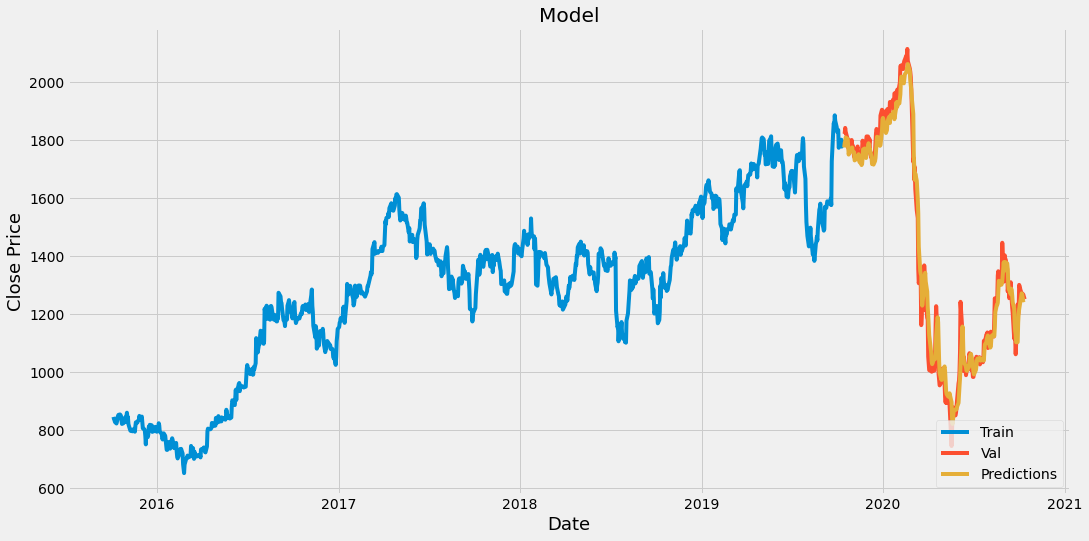

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-10-15,1818.750000,1773.611328
2019-10-16,1821.300049,1788.675659
2019-10-17,1840.900024,1795.679932
2019-10-18,1827.550049,1808.235107
2019-10-22,1801.800049,1803.028931
...,...,...
2020-10-06,1273.400024,1271.515503
2020-10-07,1263.500000,1268.396240
2020-10-08,1255.050049,1257.748413


In [ ]:
len(test_data)

307

In [ ]:
x_input=test_data[207:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.13501576121436298,
 0.13617999359469468,
 0.1428913942941955,
 0.1585056845622026,
 0.17073006185692496,
 0.21140939372890344,
 0.2182577703200621,
 0.23989866542762772,
 0.28526916034405403,
 0.4037802670950469,
 0.348274224982714,
 0.2978016393468662,
 0.24099438896254366,
 0.2756129660701897,
 0.2583550069014615,
 0.24517188196348105,
 0.23089303349058465,
 0.238186571279838,
 0.24222708838911755,
 0.249349416763592,
 0.2686960388344417,
 0.28263255207612736,
 0.27643473782178984,
 0.2809546496522852,
 0.24349406313798605,
 0.2415833393175817,
 0.2266860720723085,
 0.22671963680865315,
 0.2357978321109444,
 0.2475345802472655,
 0.2549992856521244,
 0.27429804766928223,
 0.26612789761275724,
 0.2671209623774835,
 0.27016845652121024,
 0.2732845013095263,
 0.25626630220016633,
 0.2692782177233679,
 0.2699630553824838,
 0.2633543552523462,
 0.261265566952704,
 0.2654088682296938,
 0.31190936200333075,
 0.3123202478791308,
 0.3084166230631621,
 0.32646216225954294,
 0.325297888080037

In [ ]:
#predicting the next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.40645307]
101
1 day input [0.13617999 0.14289139 0.15850568 0.17073006 0.21140939 0.21825777
 0.23989867 0.28526916 0.40378027 0.34827422 0.29780164 0.24099439
 0.27561297 0.25835501 0.24517188 0.23089303 0.23818657 0.24222709
 0.24934942 0.26869604 0.28263255 0.27643474 0.28095465 0.24349406
 0.24158334 0.22668607 0.22671964 0.23579783 0.24753458 0.25499929
 0.27429805 0.2661279  0.26712096 0.27016846 0.2732845  0.2562663
 0.26927822 0.26996306 0.26335436 0.26126557 0.26540887 0.31190936
 0.31232025 0.30841662 0.32646216 0.32529789 0.33152989 0.29492535
 0.29581568 0.29855503 0.30307494 0.3334132  0.32591426 0.3254691
 0.32444184 0.32173677 0.37162717 0.41210106 0.40436245 0.39850705
 0.41586767 0.46603203 0.47585943 0.44997262 0.45305439 0.45853309
 0.45887551 0.46781259 0.54304207 0.45127383 0.51366252 0.51342284
 0.50366391 0.50284205 0.48048208 0.42819475 0.44045336 0.43795368
 0.41240929 0.44993834 0.41922339 0.40792357 0.39015206 0.37755103
 0.31721685 0.32498974 0.31762774 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new,scaler.inverse_transform(scaled_data[1136:])

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]), array([[ 851.45001221],
        [ 861.25      ],
        [ 884.04998779],
        [ 901.90002441],
        [ 961.29998779],
        [ 971.29998779],
        [1002.90002441],
        [1069.15002441],
        [1242.19995117],
        [1161.15002441],
        [1087.44995117],
        [1004.5       ],
        [1055.05004883],
        [1029.84997559],
        [1010.59997559],
        [ 989.75      ],
        [1000.40002441],
        [1

In [ ]:
#Predictions of 13 october to 13 Novemeber.
day_pred,scaler.inverse_transform(lst_output)

(array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130]), array([[1246.10278259],
        [1242.01484945],
        [1238.7637115 ],
        [1236.43074619],
        [1234.78957624],
        [1233.57087276],
        [1232.54342805],
        [1231.54183264],
        [1230.46978264],
        [1229.28924388],
        [1228.00426347],
        [1226.64317121],
        [1225.2440883 ],
        [1223.84383043],
        [1222.47155421],
        [1221.14605914],
        [1219.87639684],
        [1218.66322006],
        [1217.50195949],
        [1216.38478199],
        [1215.30341928],
        [1214.24999471],
        [1213.21819826],
        [1212.20363469],
        [1211.2033448 ],
        [1210.21602309],
        [1209.24110382],
        [1208.27867404],
        [1207.32912539],
        [1206.39284953]]))

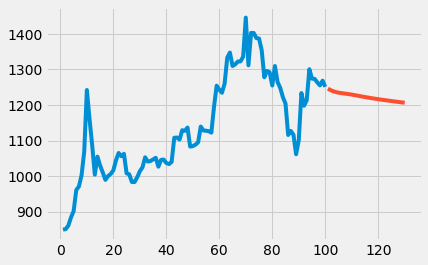

In [ ]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
#Create a new dataframe to predict the next day open price 19th oct.
#new_df = df.filter(['Open'])
#Get teh last 60 day closing price 
###last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
#last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
#X_test = []
#Append teh past 60 days
#X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
#X_test = np.array(X_test)
#Reshape the data
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
#pred_price_open = model.predict(X_test)
#undo the scaling 
#pred_price_open = scaler.inverse_transform(pred_price_open)

In [ ]:
#getting the Last 60 data to predict the next day ie...8th october with 99% accuracy.
#pred_price_open